In [9]:
import numpy as np 
import matplotlib.pyplot as plt 



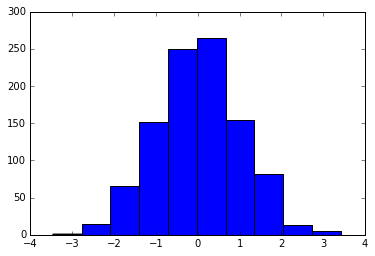

In [13]:
%matplotlib inline 
a = np.random.normal(loc=0.0, scale=1.0, size=1000)
plt.hist(a)
err = 0.001 * a 

In [18]:
def calcWeightedMean(y,yerr):
    ''' Calculate the weighted mean '''
    N = len(y)
    if N == 1 : 
        return float(y)    
    elif N == 0 : 
        return np.nan
    else: 
        # weights = 1 / (yerr ** 2.0)  
        # wMean = np.sum(weights * flux) / np.sum(weights)
        return float(np.add.reduce(y / (yerr * yerr)) / np.add.reduce((1/yerr)*(1/yerr)))

    
def calcWeightedStDev(y, yerr, yWmean):
    ''' Calculate the  weighted standard deviation
    Needs the weighted mean on y to be calculated 
    beforehand, using eg. calcWeightedMean()
    I'm using Bessel's correction to make it unbiased ...
    
    # calculate  weighted standard deviation corrected for intrinsic scatter 
    # using http://www.itl.nist.gov/div898/software/dataplot/refman2/ch2/weightsd.pdf
    # Yusra uses 1/N-1 instead of N/N-1.... calcWStdCorrAndMean
    # I'm pretty confused having read https://en.wikipedia.org/wiki/Bessel's_correction
    # and https://en.wikipedia.org/wiki/Weighted_arithmetic_mean#Weighted_sample_variance
    # after that http://stats.stackexchange.com/questions/6534/how-do-i-calculate-a-weighted-standard-deviation-in-excel I'm done. 

    '''
    N = len(y)
    if N == 1:
        return float(yerr)
    elif N == 0:
        return np.nan 
    else :     
        weights=1.0 / ( yerr *yerr)
        return np.sqrt((1 / (N-1.0) ) * (np.sum(weights * ((y - yWmean) ** 2.0)) / np.sum(weights)))  


In [16]:
wstdev_NN1 = calcWeightedStDev(a, 0.001*a, calcWeightedMean(a,0.001*a))

In [20]:
wstdev_N1 =  calcWeightedStDev(a, 0.001*a, calcWeightedMean(a,0.001*a))

In [25]:
wstdev_N1

7.7864164944293818e-05

In [23]:
mean = calcWeightedMean(a,0.001*a)
mean

-5.704453846187589e-05